In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC



In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
df = pd.read_csv('WineQT.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [6]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

In [7]:
df.duplicated().value_counts()

False    1143
Name: count, dtype: int64

In [8]:
df.describe().round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00
mean,8.31,0.53,0.27,2.53,0.09,15.62,45.91,1.00,3.31,0.66,10.44,5.66,804.97
std,1.75,0.18,0.20,1.36,0.05,10.25,32.78,0.00,0.16,0.17,1.08,0.81,464.00
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00,0.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,21.00,1.00,3.20,0.55,9.50,5.00,411.00
50%,7.90,0.52,0.25,2.20,0.08,13.00,37.00,1.00,3.31,0.62,10.20,6.00,794.00
75%,9.10,0.64,0.42,2.60,0.09,21.00,61.00,1.00,3.40,0.73,11.10,6.00,1209.50
max,15.90,1.58,1.00,15.50,0.61,68.00,289.00,1.00,4.01,2.00,14.90,8.00,1597.00


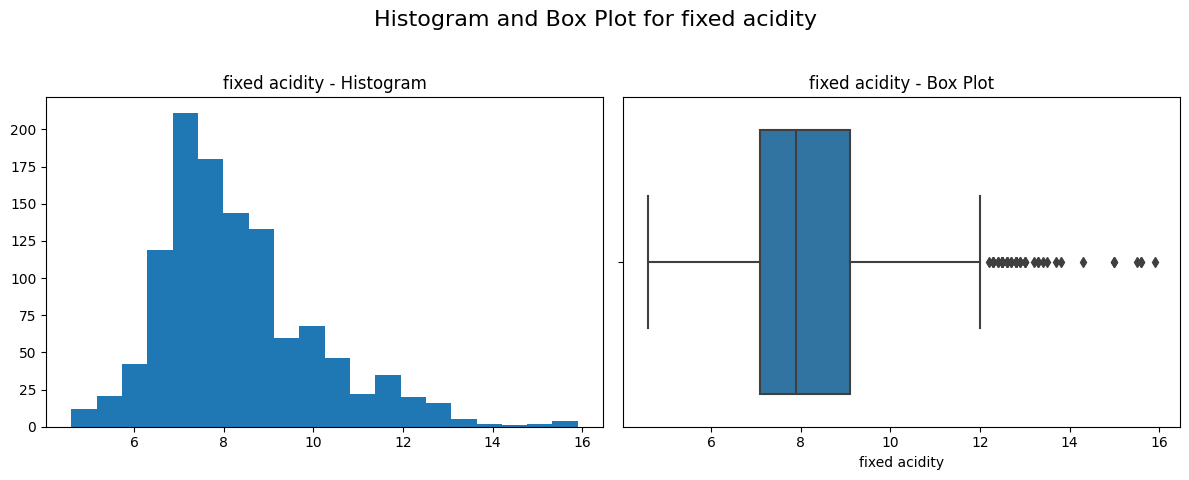

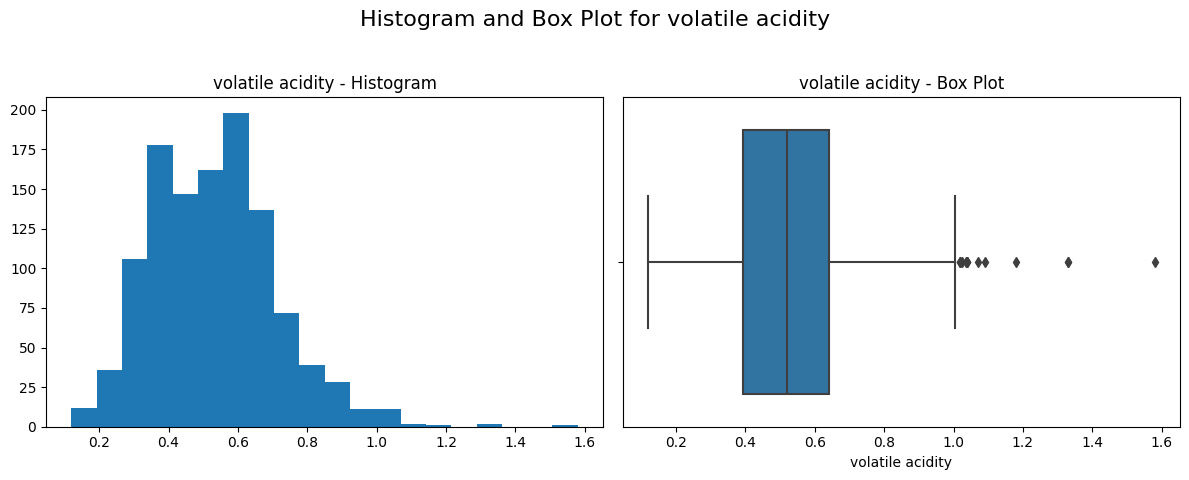

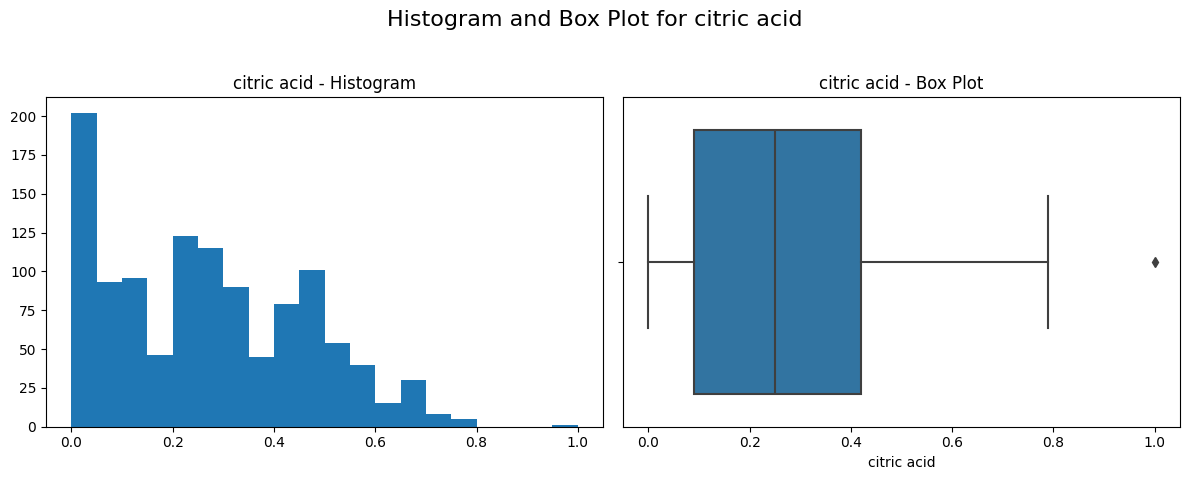

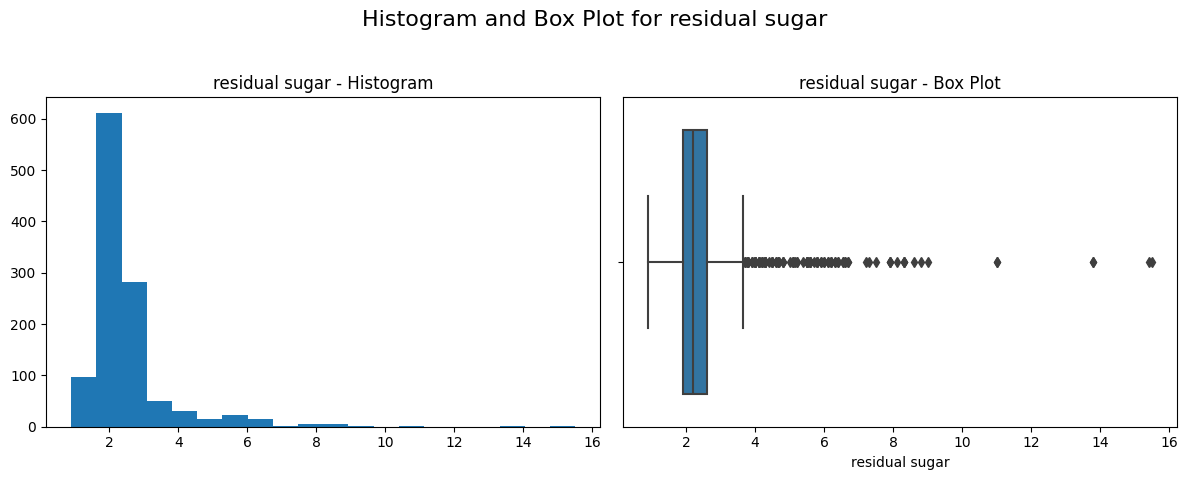

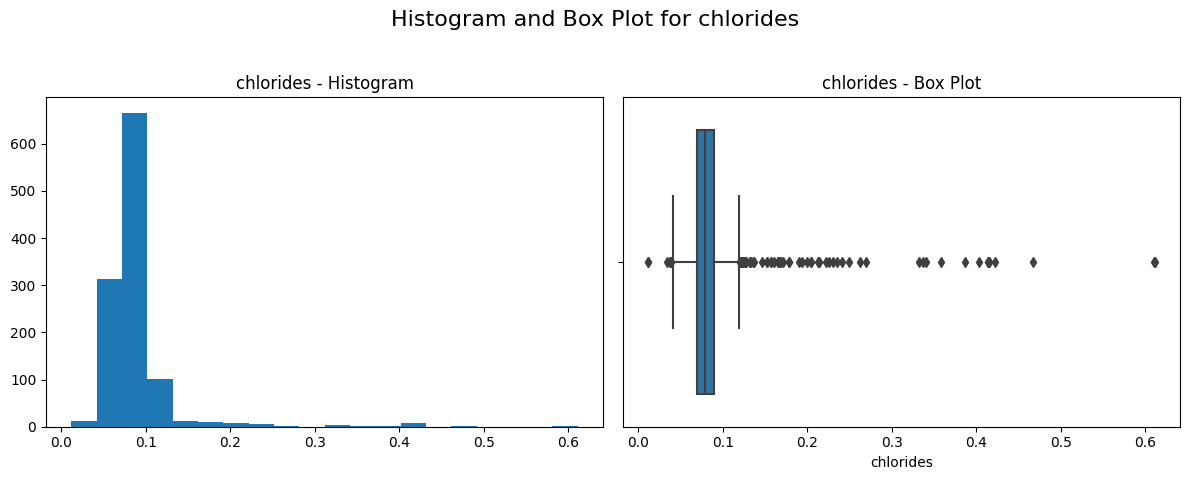

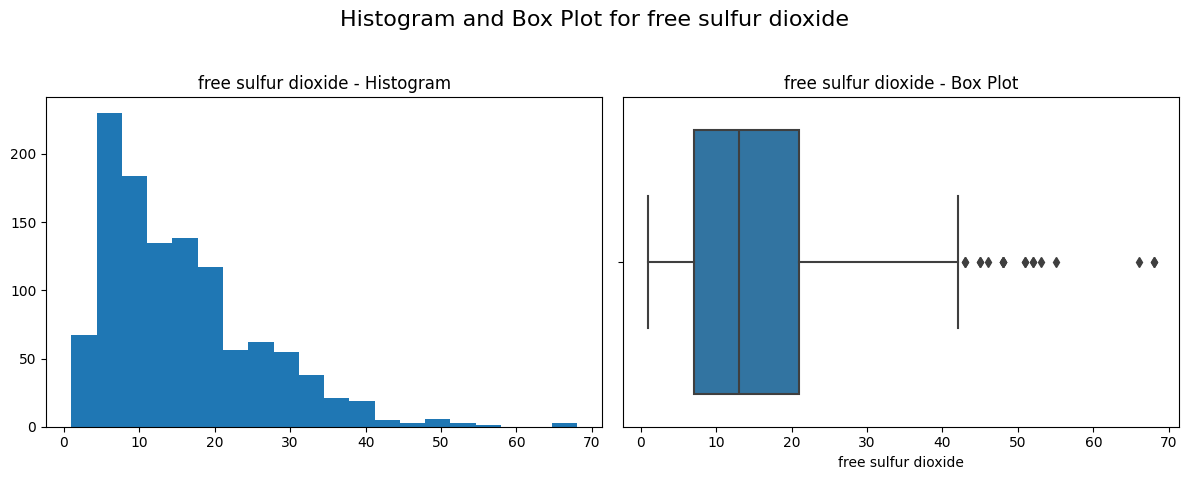

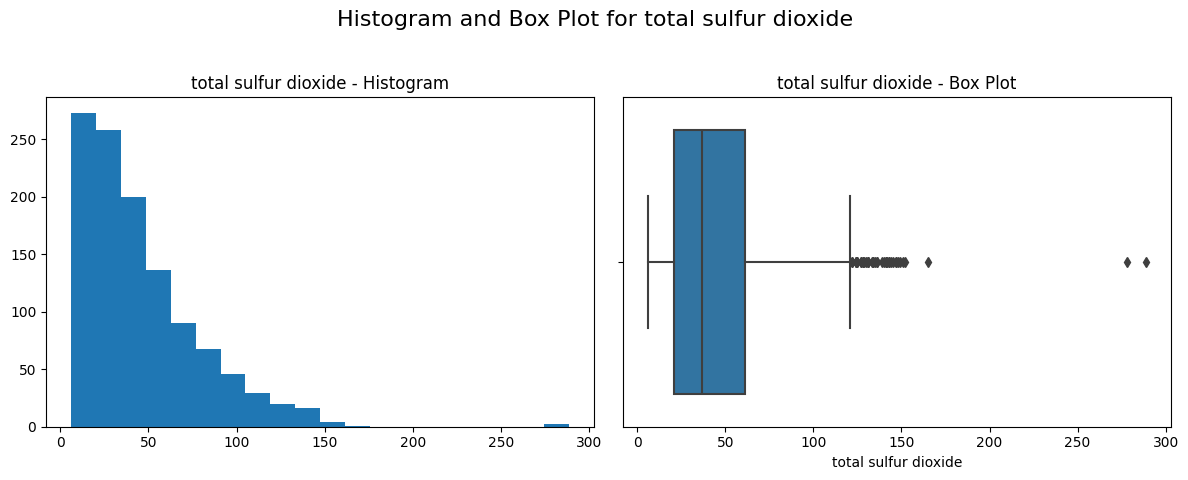

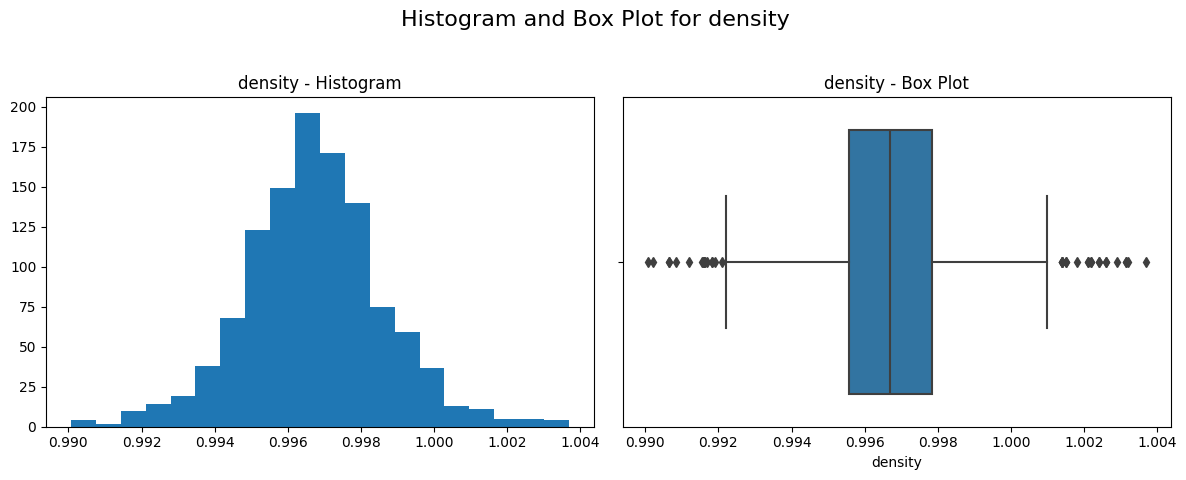

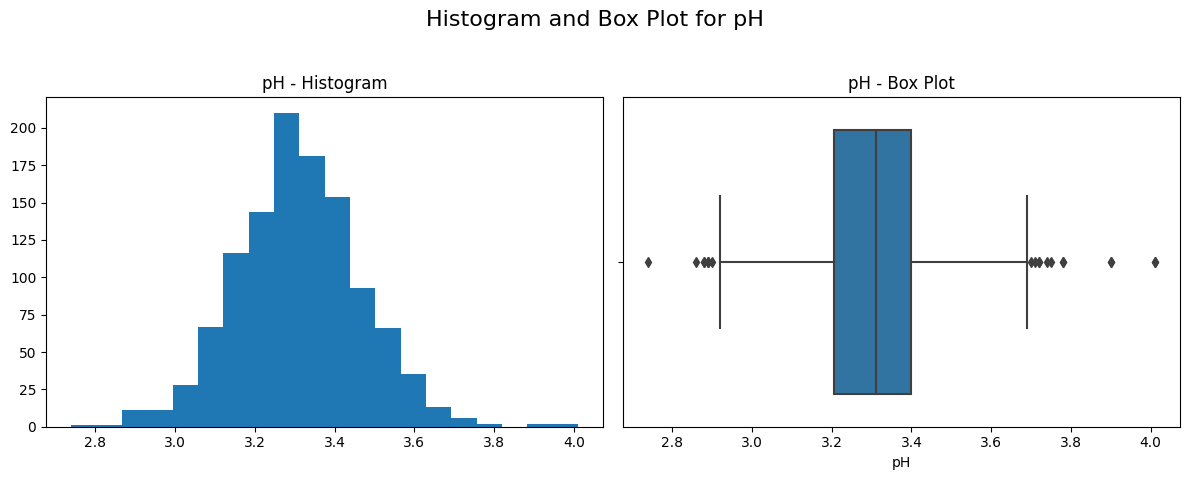

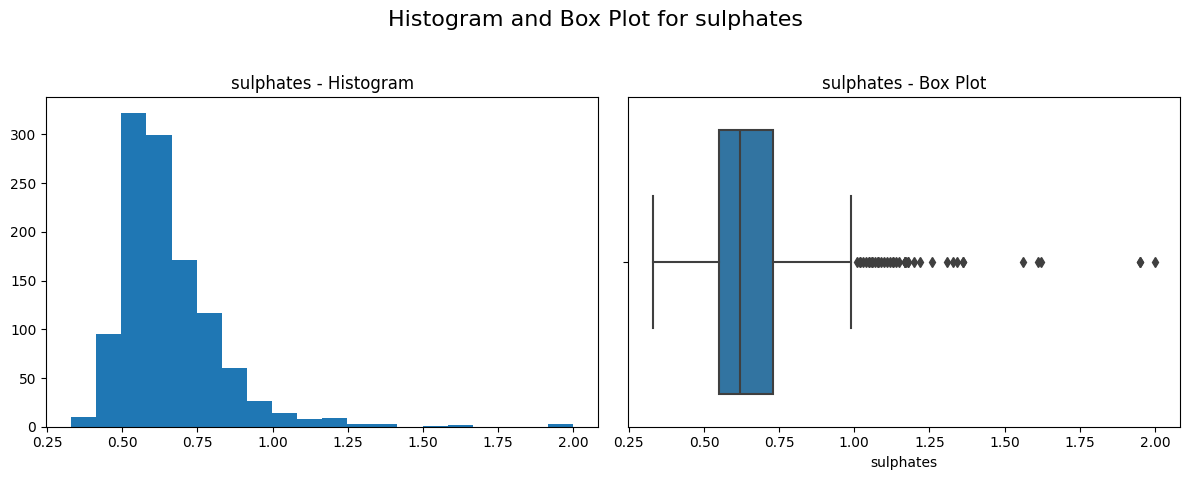

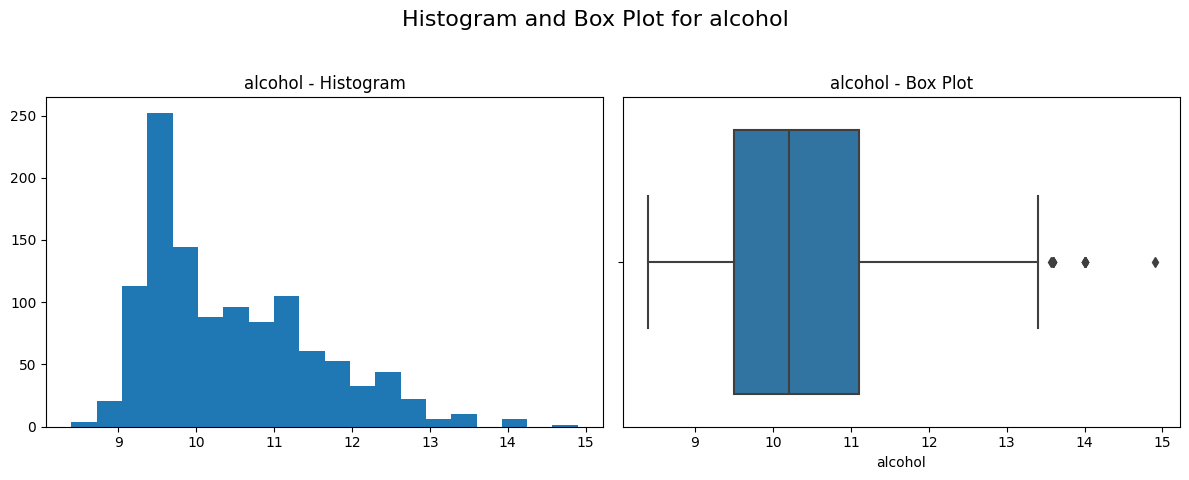

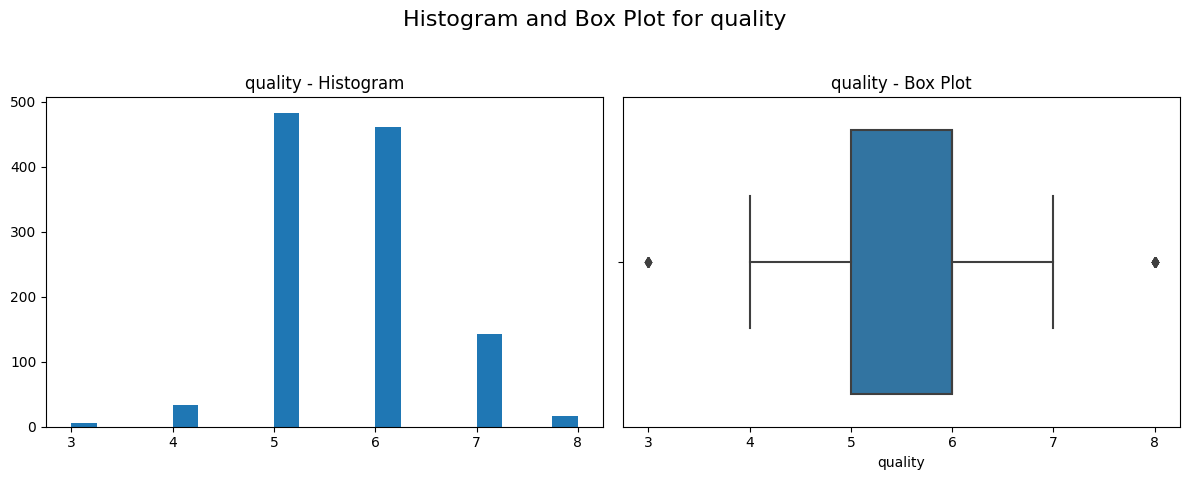

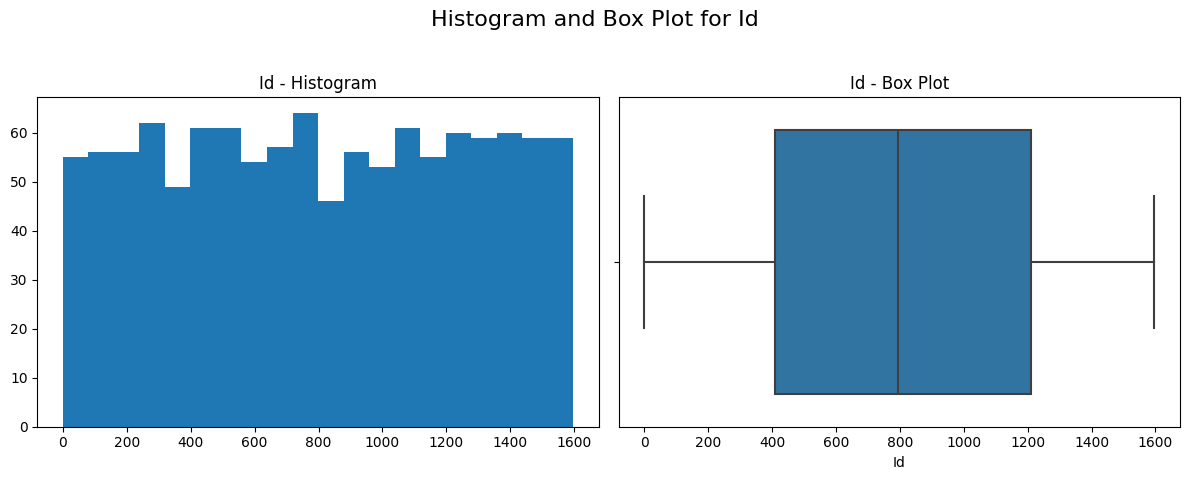

In [9]:
methods = df.columns.tolist()

for method in methods:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle(f'Histogram and Box Plot for {method}', fontsize=16)

    axes[0].hist(df[method], bins=20)
    axes[0].set_title(f'{method} - Histogram')

    sns.boxplot(x=method, data=df, ax=axes[1])
    axes[1].set_title(f'{method} - Box Plot')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [10]:
for column in df:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_lower = df[df[column] < lower_bound]
    outliers_upper = df[df[column] > upper_bound]

    display(f"Column '{column}':")
    print(f"Number of outliers (lower outlier): {len(outliers_lower)}")
    print(f"Number of outliers (upper outlier): {len(outliers_upper)}")
    print()

"Column 'fixed acidity':"

Number of outliers (lower outlier): 0
Number of outliers (upper outlier): 44



"Column 'volatile acidity':"

Number of outliers (lower outlier): 0
Number of outliers (upper outlier): 14



"Column 'citric acid':"

Number of outliers (lower outlier): 0
Number of outliers (upper outlier): 1



"Column 'residual sugar':"

Number of outliers (lower outlier): 0
Number of outliers (upper outlier): 110



"Column 'chlorides':"

Number of outliers (lower outlier): 8
Number of outliers (upper outlier): 69



"Column 'free sulfur dioxide':"

Number of outliers (lower outlier): 0
Number of outliers (upper outlier): 18



"Column 'total sulfur dioxide':"

Number of outliers (lower outlier): 0
Number of outliers (upper outlier): 40



"Column 'density':"

Number of outliers (lower outlier): 16
Number of outliers (upper outlier): 20



"Column 'pH':"

Number of outliers (lower outlier): 8
Number of outliers (upper outlier): 12



"Column 'sulphates':"

Number of outliers (lower outlier): 0
Number of outliers (upper outlier): 43



"Column 'alcohol':"

Number of outliers (lower outlier): 0
Number of outliers (upper outlier): 12



"Column 'quality':"

Number of outliers (lower outlier): 6
Number of outliers (upper outlier): 16



"Column 'Id':"

Number of outliers (lower outlier): 0
Number of outliers (upper outlier): 0



In [11]:
df[df['fixed acidity'] == 15.90]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
462,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.9976,2.98,0.84,14.9,5,652


In [12]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


<Axes: xlabel='quality', ylabel='count'>

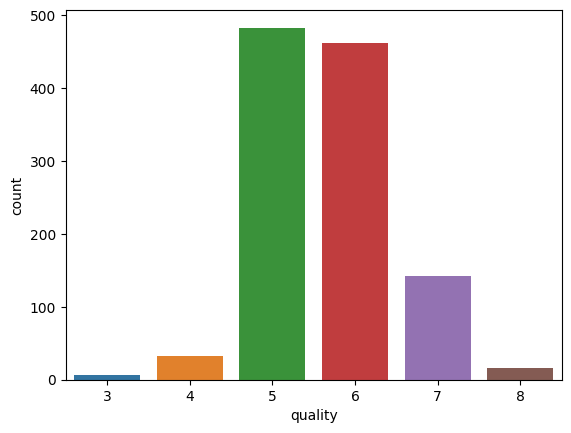

In [13]:
sns.countplot(x='quality', data=df)

In [14]:
corr_matrix = df.corr().round(2)
corr_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
fixed acidity,1.00,-0.25,0.67,0.17,0.11,-0.16,-0.11,0.68,-0.69,0.17,-0.08,0.12,-0.28
volatile acidity,-0.25,1.00,-0.54,-0.01,0.06,-0.00,0.08,0.02,0.22,-0.28,-0.20,-0.41,-0.01
citric acid,0.67,-0.54,1.00,0.18,0.25,-0.06,0.04,0.38,-0.55,0.33,0.11,0.24,-0.14
residual sugar,0.17,-0.01,0.18,1.00,0.07,0.17,0.19,0.38,-0.12,0.02,0.06,0.02,-0.05
chlorides,0.11,0.06,0.25,0.07,1.00,0.02,0.05,0.21,-0.28,0.37,-0.23,-0.12,-0.09
free sulfur dioxide,-0.16,-0.00,-0.06,0.17,0.02,1.00,0.66,-0.05,0.07,0.03,-0.05,-0.06,0.10
total sulfur dioxide,-0.11,0.08,0.04,0.19,0.05,0.66,1.00,0.05,-0.06,0.03,-0.19,-0.18,-0.11
density,0.68,0.02,0.38,0.38,0.21,-0.05,0.05,1.00,-0.35,0.14,-0.49,-0.18,-0.36
pH,-0.69,0.22,-0.55,-0.12,-0.28,0.07,-0.06,-0.35,1.00,-0.19,0.23,-0.05,0.13
sulphates,0.17,-0.28,0.33,0.02,0.37,0.03,0.03,0.14,-0.19,1.00,0.09,0.26,-0.10


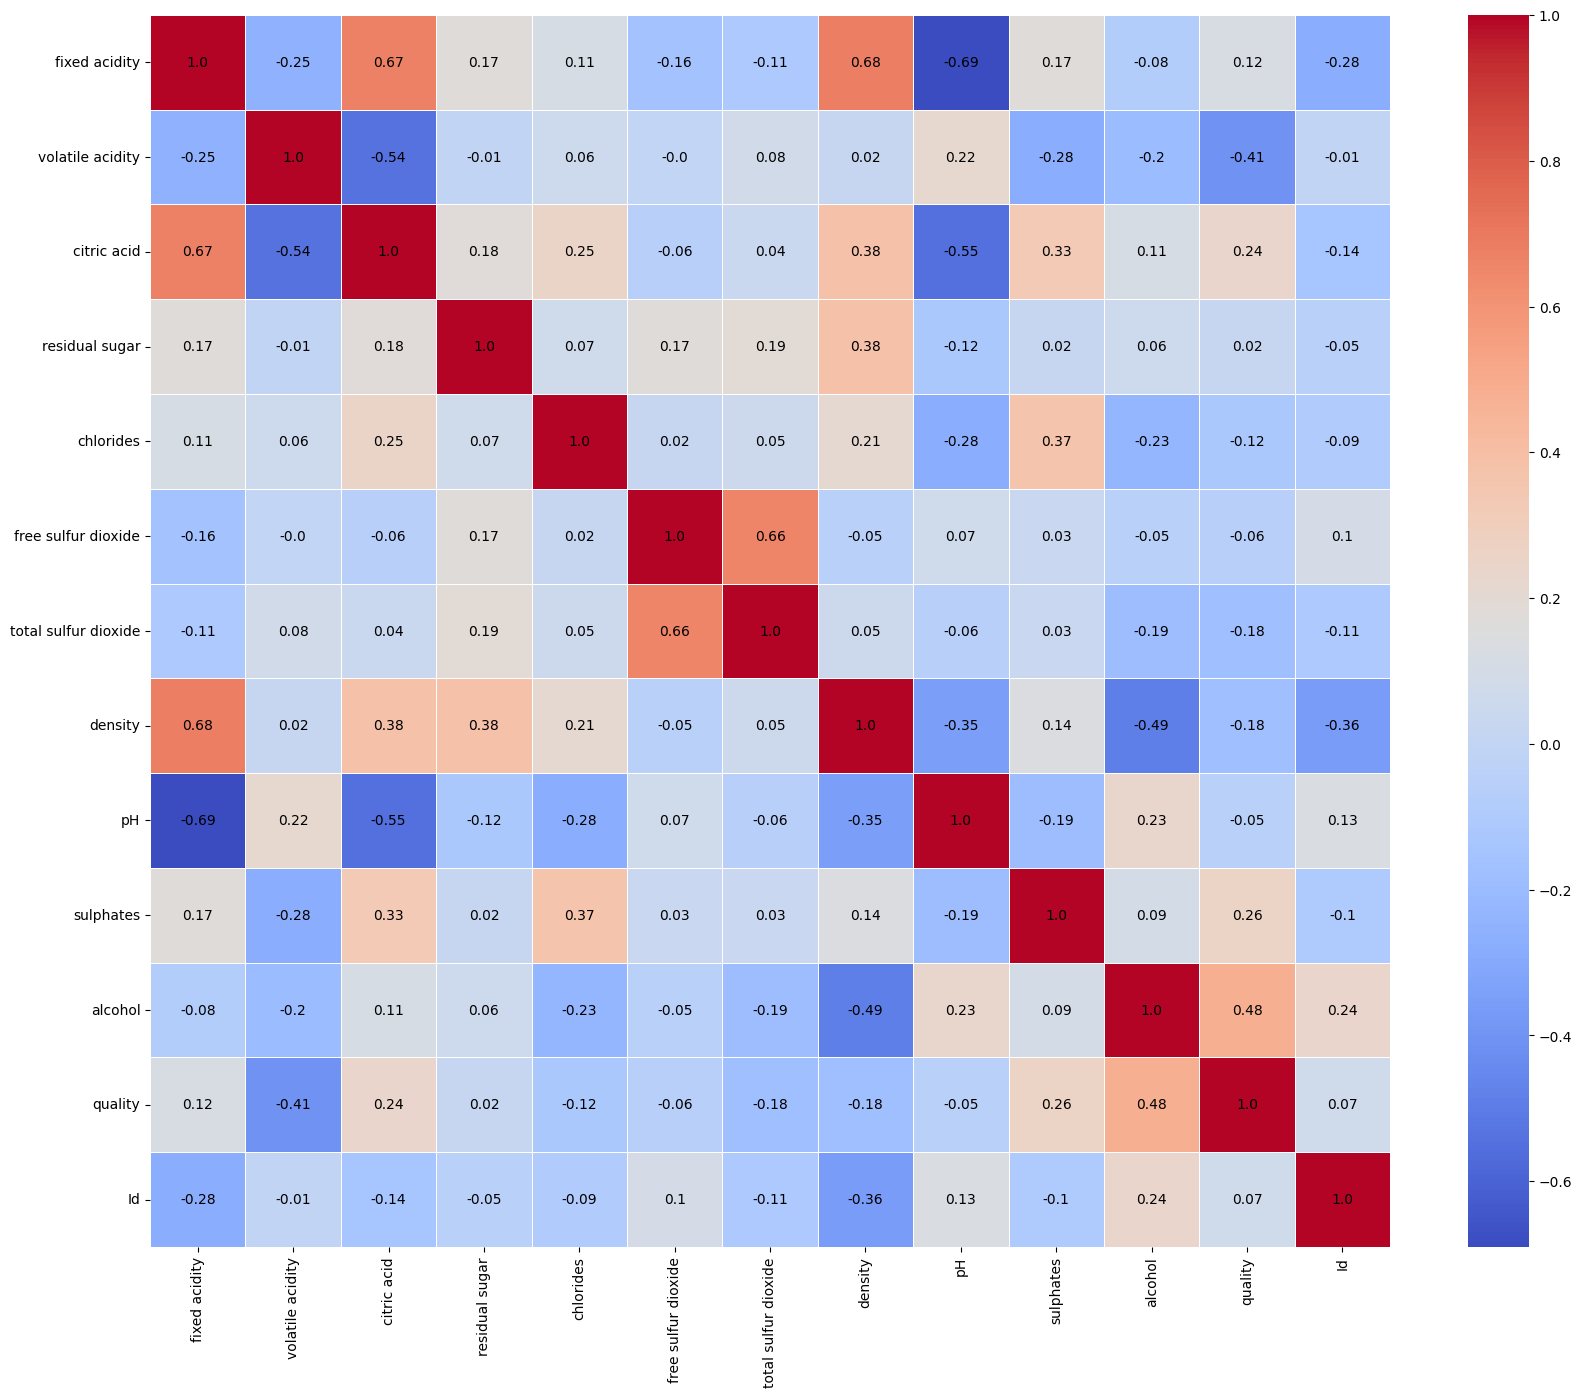

In [15]:
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5)
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        text = plt.text(j + 0.5, i + 0.5, f"{corr_matrix.iloc[i, j]}",
                        ha='center', va='center', color='black')
plt.show()

In [16]:
X = df.drop('quality', axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## LinearRegression

In [17]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [18]:
y_pred = lr.predict(X_test)

In [19]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Model:")
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Linear Regression Model:
Mean Absolute Error: 0.4817302545513365
Mean Squared Error: 0.38138982193455506
Root Mean Squared Error: 0.6175676658752101
R-squared: 0.3146301263768764


## LogisticRegression

In [20]:
lg = LogisticRegression(max_iter=1000, random_state=42)
lg.fit(X_train, y_train)
y_pred = lg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Logistic Regression Model:")
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-Score: {:.2f}".format(f1))

Logistic Regression Model:
Accuracy: 0.65
Precision: 0.62
Recall: 0.65
F1-Score: 0.63


/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## DecisionTreeClassifier

In [21]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Decision Tree Model:")
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-Score: {:.2f}".format(f1))


Decision Tree Model:
Accuracy: 0.55
Precision: 0.56
Recall: 0.55
F1-Score: 0.56


/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## RandomForestClassifier

In [22]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Random Forest Model:")
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-Score: {:.2f}".format(f1))


Random Forest Model:
Accuracy: 0.67
Precision: 0.66
Recall: 0.67
F1-Score: 0.66


/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## SVC

In [23]:
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("SVM Model:")
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-Score: {:.2f}".format(f1))

SVM Model:
Accuracy: 0.64
Precision: 0.62
Recall: 0.64
F1-Score: 0.62


/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## SMOTE

In [24]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

rf_smote_model = RandomForestClassifier(random_state=42)
rf_smote_model.fit(X_train_resampled, y_train_resampled)
y_pred = rf_smote_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Random Forest Model with SMOTE:")
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-Score: {:.2f}".format(f1))

Random Forest Model with SMOTE:
Accuracy: 0.62
Precision: 0.64
Recall: 0.62
F1-Score: 0.63


/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## GridSearchCV

In [30]:
rf_model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    }

scorer = make_scorer(accuracy_score)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs=-1, error_score='raise')
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-Validation Score: {:.2f}".format(grid_search.best_score_))

best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: {:.2f}".format(test_accuracy))


Best Parameters:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Score: 0.66
Test Accuracy: 0.68


In [31]:
print("Best Test Score : ",grid_search.score(X_test, y_test))


Best Test Score :  0.6768558951965066


In [32]:
best_rf_model

RandomForestClassifier(max_depth=20, random_state=42)

### Best score: 0.68